<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 수치예측 - 중고차 판매 가격

중고차 판매 데이터 활용
- Dubizzle used car sales data 데이터 활용
- 출처 : [Dubizzle used car sales data](https://www.kaggle.com/datasets/alihassankp/dubizzle-used-car-sale-data)
- 총 20개 컬럼 중 Target 컬럼은 `price_in_aed`

---

# Import Libraries & Load data

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/Dubizzle_used_car_sales.csv')
df

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,AED7525month | 2015 Land Rover Range Rover Aut...,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover,18/11/2021
9966,LOW MILEAGE Cadillac Escalade Platinum,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade,11/05/2022
9967,WARRANTY AVAILABLE || Range Rover Sport SVR Ca...,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport,14/12/2021
9968,Chevrolet Malibu GCC Spec,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu,06/03/2022


In [3]:
# Visual Python: Library > columns
df.columns

Index(['title', 'price_in_aed', 'kilometers', 'body_condition',
       'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company',
       'model', 'date_posted'],
      dtype='object')

In [4]:
# 타겟 컬럼
target_col = 'price_in_aed'

# EDA & Data Preprocessing

#### Q. 데이터의 상위 5개 행을 출력하세요.

In [5]:
# Visual Python: Data Analysis > Data Info
df.head()

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022
2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class,05/05/2022
3,WARRANTY UNTIL APR 2023 || Ferrari 488 Spider ...,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider,30/04/2022
4,USED RENAULT DOKKER 2020,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker,13/05/2022


#### Q. 각 컬럼별 데이터 타입과 데이터 개수를 확인하세요.

In [6]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   int64  
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9911 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

#### Q. `title`, `date_posted` 컬럼을 삭제하세요.

In [7]:
# Visual Python: Data Analysis > Frame
df.drop(['title'], axis=1, inplace=True)
df.drop(['date_posted'], axis=1, inplace=True)
df

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model
0,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9965,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover
9966,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade
9967,679000,100,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,Other,400 - 500 HP,Gasoline,Left Hand Side,NaN,Black,Dubai,SVR,land-rover,range-rover-sport
9968,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu


#### Q. 각 컬럼의 결측치 수를 확인하세요.

In [8]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
price_in_aed,0,9970
kilometers,0,9970
body_condition,0,9970
mechanical_condition,0,9970
seller_type,0,9970
body_type,0,9970
no_of_cylinders,59,9911
transmission_type,0,9970
regional_specs,0,9970
horsepower,0,9970


#### Q. 결측치가 있는 행을 제거하세요.

In [9]:
# Visual Python: Data Analysis > Frame
df.dropna(axis=0, subset=['no_of_cylinders','year','motors_trim'], how='any', inplace=True)
df

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model
0,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,225000,0,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2021.0,White,Dubai,Limited,jeep,grand-cherokee
9965,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover
9966,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade
9968,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu


#### Q. `no_of_cylinders` 컬럼의 'None', 'Unknown' 행을 삭제하세요

In [10]:
# Visual Python: Data Analysis > Subset
df = df.loc[(df['no_of_cylinders'] != 'None')&(df['no_of_cylinders'] != 'Unknown'), :]
df

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model
0,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,225000,0,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2021.0,White,Dubai,Limited,jeep,grand-cherokee
9965,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover
9966,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade
9968,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu


#### Q. `no_of_cylinders` 컬럼의 타입을 int로 바꾸세요.

In [11]:
# Visual Python: Data Analysis > Frame
df = df.astype({'no_of_cylinders': 'int64'})
df

,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model
0,26000,167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero
1,110000,39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado
2,78000,200000,Perfect inside and out,Perfect inside and out,Dealer,Sedan,6,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,Blue,Sharjah,E 300,mercedes-benz,e-class
3,899000,27000,Perfect inside and out,Perfect inside and out,Dealer,Hard Top Convertible,8,Automatic Transmission,GCC Specs,600 - 700 HP,Gasoline,Left Hand Side,2018.0,Red,Dubai,Standard,ferrari,488-spider
4,33000,69000,Perfect inside and out,Perfect inside and out,Owner,Wagon,4,Manual Transmission,GCC Specs,Less than 150 HP,Gasoline,Left Hand Side,2020.0,White,Dubai,Standard,renault,dokker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,225000,0,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,200 - 300 HP,Gasoline,Left Hand Side,2021.0,White,Dubai,Limited,jeep,grand-cherokee
9965,215000,105777,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,GCC Specs,500 - 600 HP,Gasoline,Left Hand Side,2015.0,White,Dubai,Autobiography,land-rover,range-rover
9966,90000,55640,Perfect inside and out,Perfect inside and out,Owner,SUV,8,Automatic Transmission,GCC Specs,400 - 500 HP,Gasoline,Left Hand Side,2014.0,White,Dubai,Platinum,cadillac,escalade
9968,18900,140000,"No accidents, very few faults",Perfect inside and out,Owner,Sedan,4,Automatic Transmission,GCC Specs,150 - 200 HP,Gasoline,Left Hand Side,2013.0,White,Dubai,LS,chevrolet,malibu


#### Q. 수치형 컬럼들의 통계값을 출력하세요.
- 수치형 컬럼: `price_in_aed`, `kilometers`, `no_of_cylinders`, `year`

In [12]:
# Visual Python: Data Analysis > Data Info
df[['price_in_aed', 'kilometers', 'no_of_cylinders', 'year']].describe()

,price_in_aed,kilometers,no_of_cylinders,year
count,8.905000e+03,8.905000e+03,8905.000000,8905.000000
mean,1.953533e+05,1.102300e+05,6.146098,2015.598540
std,3.880567e+05,1.220871e+06,1.921088,4.718035
min,6.000000e+03,0.000000e+00,3.000000,1953.000000
25%,4.790000e+04,3.886600e+04,4.000000,2014.000000
50%,8.999900e+04,8.840000e+04,6.000000,2016.000000
75%,1.809990e+05,1.406540e+05,8.000000,2019.000000
max,1.499900e+07,1.150000e+08,12.000000,2021.000000


#### Q. 수치형 컬럼간 상관계수를 확인하시오.
- 수치형 컬럼: `price_in_aed`, `kilometers`, `no_of_cylinders`, `year`

In [13]:
# Visual Python: Data Analysis > Data Info
df[['price_in_aed', 'kilometers', 'no_of_cylinders', 'year']].corr(numeric_only=True)

,price_in_aed,kilometers,no_of_cylinders,year
price_in_aed,1.000000,-0.022822,0.404346,0.243937
kilometers,-0.022822,1.000000,0.006069,-0.052167
no_of_cylinders,0.404346,0.006069,1.000000,-0.099211
year,0.243937,-0.052167,-0.099211,1.000000


#### Q. 모든 범주형 컬럼을 라벨 인코딩한 후 원본 컬럼을 삭제하세요.

In [14]:
# Visual Python: Data Analysis > Frame
df['body_condition_label'] = pd.Categorical(df['body_condition']).codes
df['mechanical_condition_label'] = pd.Categorical(df['mechanical_condition']).codes
df['seller_type_label'] = pd.Categorical(df['seller_type']).codes
df['body_type_label'] = pd.Categorical(df['body_type']).codes
df['transmission_type_label'] = pd.Categorical(df['transmission_type']).codes
df['regional_specs_label'] = pd.Categorical(df['regional_specs']).codes
df['horsepower_label'] = pd.Categorical(df['horsepower']).codes
df['fuel_type_label'] = pd.Categorical(df['fuel_type']).codes
df['steering_side_label'] = pd.Categorical(df['steering_side']).codes
df['color_label'] = pd.Categorical(df['color']).codes
df['emirate_label'] = pd.Categorical(df['emirate']).codes
df['motors_trim_label'] = pd.Categorical(df['motors_trim']).codes
df['company_label'] = pd.Categorical(df['company']).codes
df['model_label'] = pd.Categorical(df['model']).codes
df.drop(['body_condition','mechanical_condition','seller_type','body_type','transmission_type','regional_specs','horsepower','fuel_type','steering_side','color','emirate','motors_trim','company','model'], axis=1, inplace=True)
df

,price_in_aed,kilometers,no_of_cylinders,year,body_condition_label,mechanical_condition_label,seller_type_label,body_type_label,transmission_type_label,regional_specs_label,horsepower_label,fuel_type_label,steering_side_label,color_label,emirate_label,motors_trim_label,company_label,model_label
0,26000,167390,6,2013.0,3,4,0,6,0,1,10,2,0,12,3,372,46,350
1,110000,39000,8,2018.0,3,4,0,6,0,3,3,2,0,15,6,15,10,432
2,78000,200000,6,2014.0,3,4,0,7,0,1,3,2,0,2,6,282,41,168
3,899000,27000,8,2018.0,3,4,0,2,0,1,5,2,0,11,3,696,14,29
4,33000,69000,4,2020.0,3,4,2,12,1,1,9,2,0,15,3,696,53,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9964,225000,0,6,2021.0,3,4,0,6,0,1,1,2,0,15,3,485,29,241
9965,215000,105777,8,2015.0,3,4,0,6,0,1,4,2,0,15,3,169,32,389
9966,90000,55640,8,2014.0,3,4,2,6,0,1,3,2,0,15,3,530,8,184
9968,18900,140000,4,2013.0,1,4,2,7,0,1,0,2,0,15,3,472,10,309


# RandomForestClassifier 모델로 분류하기

#### Q. `df`를 이용해 데이터셋을 train, test로 분리해주세요.

In [15]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['kilometers', 'no_of_cylinders', 'year', 'body_condition_label', 'mechanical_condition_label', 'seller_type_label', 'body_type_label', 'transmission_type_label', 'regional_specs_label', 'horsepower_label', 'fuel_type_label', 'steering_side_label', 'color_label', 'emirate_label', 'motors_trim_label', 'company_label', 'model_label']], df['price_in_aed'])

#### Q. RandomForestClassifier 모델을 생성하고, fit으로 학습시킨 후 예측 결과를 `pred`에 저장하세요.

In [16]:
# Visual Python: Machine Learning > Regressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [17]:
# Visual Python: Machine Learning > Fit/Predict
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [18]:
# Visual Python: Machine Learning > Fit/Predict
pred = rf_model.predict(X_test)
pred

array([ 18906.99,  54643.  , 334161.98, ...,  66664.43,  58501.  ,
       514086.9 ])

#### Q. 예측결과인 `pred`를 평가해 R squared 와 RMSE를 확인하세요.
- Visual Python: Machine Learning > Evaluation

In [19]:
# Visual Python: Machine Learning > Evaluation
from sklearn import metrics

In [20]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [21]:
# Visual Python: Machine Learning > Evaluation
# R square
print('R square: {}'.format(metrics.r2_score(y_test, pred)))

R square: 0.5844890403544537


In [22]:
# Visual Python: Machine Learning > Evaluation
# RMSE(Root Mean Squared Error)
print('RMSE: {}'.format(metrics.mean_squared_error(y_test, pred)**0.5))

RMSE: 215656.18050495736


### Regression plot

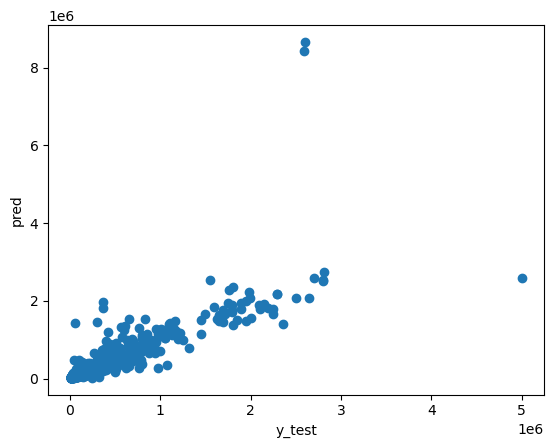

In [23]:
# Visual Python: Machine Learning > Evaluation
# Regression plot
display(Markdown('### Regression plot'))
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

#### Q. Feature Importance를 차트로 그리세요.

In [24]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

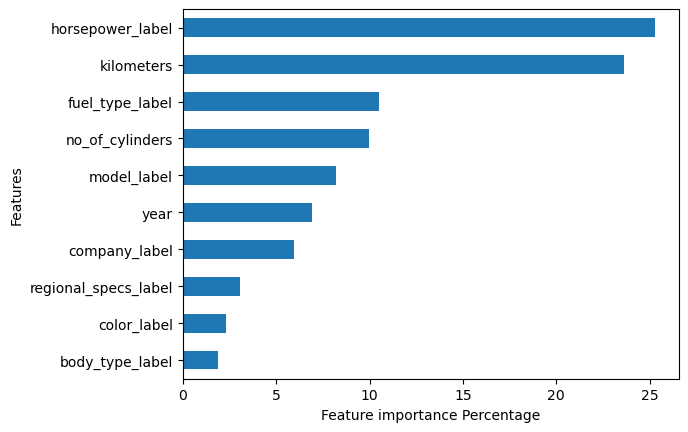

In [25]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(rf_model, X_train, sort=True, top_count=10)

---

In [26]:
# End of file